# AIM AND INTRODUCTION

## Aim
The aim of this project is to develop a predictive model for lung cancer diagnosis using a dataset that includes various features related to demographics, smoking habits, environmental factors, and healthcare access. The goal is to identify the most significant predictors of lung cancer and to evaluate the performance of different machine learning algorithms in predicting lung cancer diagnosis.

## Introduction
Lung cancer is one of the leading causes of cancer-related deaths worldwide. Early detection and accurate diagnosis are crucial for improving patient outcomes and survival rates. This project utilizes a dataset containing information on lung cancer cases across 25 countries. The dataset includes features such as age, gender, smoking status, years of smoking, exposure to air pollution, and access to healthcare.

The project involves several steps:
1. **Data Loading and Exploration**: Understanding the structure and characteristics of the dataset.
2. **Data Preprocessing**: Handling missing values, encoding categorical variables, and scaling numerical features.
3. **Data Visualization**: Creating visualizations to explore the distribution of lung cancer cases and the relationships between different features.
4. **Predictive Modeling**: Building and evaluating various machine learning models, including Logistic Regression, Random Forest, Decision Tree, K-Nearest Neighbors, and Support Vector Classifier.
5. **Model Comparison and Selection**: Comparing the performance of different models and selecting the best one based on accuracy and other evaluation metrics.
6. **Feature Importance Analysis**: Identifying the most important features for lung cancer prediction.
7. **Sample Predictions**: Making predictions on sample data to demonstrate the model's capabilities.

By the end of this project, we aim to have a robust predictive model for lung cancer diagnosis and a better understanding of the key factors contributing to lung cancer.

# IMPORT STATEMENTS

In [143]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV


# DATA LOADING

In [144]:
data=pd.read_csv('D:\\DSML\\FINAL PROJECT\\Files\\lung cancer prediction across 25 countries dataset.csv')
data

,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,Lung_Cancer_Diagnosis,...,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,China,1400,80,Male,Yes,30,29,No,No,No,...,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.00
1,Indonesia,273,47,Female,No,0,0,Yes,No,Yes,...,High,Yes,No,Poor,Yes,Chemotherapy,Developing,40000,1.16,86.18
2,Iran,84,53,Male,No,0,0,Yes,No,No,...,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.00
3,Egypt,102,71,Male,Yes,36,7,Yes,No,Yes,...,Low,No,No,Poor,No,Chemotherapy,Developing,24000,1.57,73.61
4,Mexico,128,47,Male,Yes,12,6,Yes,No,No,...,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18457,France,65,55,Male,Yes,29,20,Yes,No,No,...,High,No,No,Good,Yes,NaN,Developed,33000,1.16,0.00
18458,Italy,60,84,Male,Yes,18,18,Yes,No,No,...,Medium,No,Yes,Poor,No,NaN,Developed,31000,2.21,0.00
18459,Brazil,213,43,Female,No,0,0,No,No,No,...,Low,Yes,No,Poor,No,NaN,Developing,45000,1.83,0.00
18460,Pakistan,225,44,Male,No,0,0,No,No,No,...,High,Yes,No,Poor,No,NaN,Developing,30000,1.57,0.00


# DATA EXPLORATION

The basic information about the dataset is printed using `data.info()`, which provides details about the columns, their data types, and the number of non-null values.

In [145]:
print("\nBasic Info:")
print(data.info())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18462 entries, 0 to 18461
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      18462 non-null  object 
 1   Population_Size              18462 non-null  int64  
 2   Age                          18462 non-null  int64  
 3   Gender                       18462 non-null  object 
 4   Smoker                       18462 non-null  object 
 5   Years_of_Smoking             18462 non-null  int64  
 6   Cigarettes_per_Day           18462 non-null  int64  
 7   Passive_Smoker               18462 non-null  object 
 8   Family_History               18462 non-null  object 
 9   Lung_Cancer_Diagnosis        18462 non-null  object 
 10  Cancer_Stage                 8911 non-null   object 
 11  Survival_Years               18462 non-null  int64  
 12  Adenocarcinoma_Type          18462 non-null  object 
 13  Air

The summary statistics of the dataset are printed using `data.describe()`, which includes measures like mean, standard deviation, min, max, and quartiles for numerical columns.


In [146]:
print("\n Data Summary :")
print(data.describe())


 Data Summary :
       Population_Size           Age  Years_of_Smoking  Cigarettes_per_Day  \
count     18462.000000  18462.000000      18462.000000        18462.000000   
mean        227.256852     52.446160         10.968963            9.336800   
std         344.543248     19.178621         13.256294           10.271431   
min          54.000000     20.000000          0.000000            0.000000   
25%          83.000000     36.000000          0.000000            0.000000   
50%         113.000000     52.500000          3.000000            6.000000   
75%         206.000000     69.000000         22.000000           18.000000   
max        1400.000000     85.000000         40.000000           30.000000   

       Survival_Years  Annual_Lung_Cancer_Deaths  Lung_Cancer_Prevalence_Rate  \
count    18462.000000               18462.000000                 18462.000000   
mean         2.657459               62494.296013                     1.505652   
std          3.398045              12

The number of missing values in each column is printed using `data.isnull().sum()`.


In [147]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Country                            0
Population_Size                    0
Age                                0
Gender                             0
Smoker                             0
Years_of_Smoking                   0
Cigarettes_per_Day                 0
Passive_Smoker                     0
Family_History                     0
Lung_Cancer_Diagnosis              0
Cancer_Stage                    9551
Survival_Years                     0
Adenocarcinoma_Type                0
Air_Pollution_Exposure             0
Occupational_Exposure              0
Indoor_Pollution                   0
Healthcare_Access                  0
Early_Detection                    0
Treatment_Type                 11833
Developed_or_Developing            0
Annual_Lung_Cancer_Deaths          0
Lung_Cancer_Prevalence_Rate        0
Mortality_Rate                     0
dtype: int64


In [148]:
duplicates = data.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

Number of duplicate rows: 1


# Handling missing values and duplicate rows 

Missing values in specific columns have been filled with appropriate values, and duplicate rows have been removed.

In [149]:
data = data.drop_duplicates()
print(f'Number of duplicate rows after deletion: {data.duplicated().sum()}')

Number of duplicate rows after deletion: 0


In [150]:
print("\nUnique values in Cancer_Stage column:")
print(data['Cancer_Stage'].unique())


Unique values in Cancer_Stage column:
[nan 'Stage 3' 'Stage 1' 'Stage 4' 'Stage 2']


In [151]:
data['Cancer_Stage'].fillna('No Cancer', inplace=True)
print(data['Cancer_Stage'].unique())

['No Cancer' 'Stage 3' 'Stage 1' 'Stage 4' 'Stage 2']


In [152]:
print("\nUnique values in Treatment_Type column:")
print(data['Treatment_Type'].unique())


Unique values in Treatment_Type column:
[nan 'Chemotherapy' 'Surgery' 'Radiotherapy']


In [153]:
data['Treatment_Type'].fillna('None', inplace=True)
print(data['Treatment_Type'].unique())

['None' 'Chemotherapy' 'Surgery' 'Radiotherapy']


In [154]:
data.isnull().sum()

Country                        0
Population_Size                0
Age                            0
Gender                         0
Smoker                         0
Years_of_Smoking               0
Cigarettes_per_Day             0
Passive_Smoker                 0
Family_History                 0
Lung_Cancer_Diagnosis          0
Cancer_Stage                   0
Survival_Years                 0
Adenocarcinoma_Type            0
Air_Pollution_Exposure         0
Occupational_Exposure          0
Indoor_Pollution               0
Healthcare_Access              0
Early_Detection                0
Treatment_Type                 0
Developed_or_Developing        0
Annual_Lung_Cancer_Deaths      0
Lung_Cancer_Prevalence_Rate    0
Mortality_Rate                 0
dtype: int64

# VISUALIZATION

# Count of lung cancer cases

This bar chart shows the count of lung cancer cases in the dataset. The data is grouped by the diagnosis status, providing a visual representation of the number of individuals diagnosed with lung cancer versus those who are not. This helps in understanding the distribution of lung cancer cases in the dataset.

In [155]:
print(data['Lung_Cancer_Diagnosis'].value_counts())

Lung_Cancer_Diagnosis
No     9550
Yes    8911
Name: count, dtype: int64


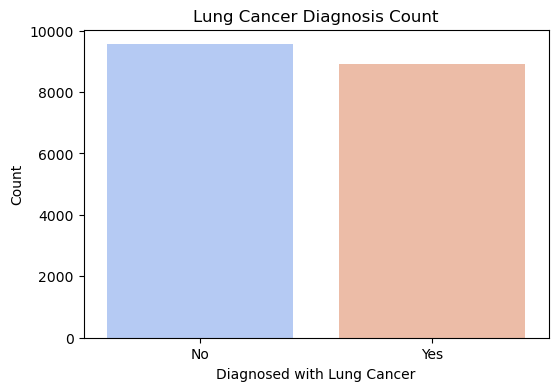

In [156]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Lung_Cancer_Diagnosis", data=data, palette="coolwarm")
plt.title("Lung Cancer Diagnosis Count")
plt.xlabel("Diagnosed with Lung Cancer")
plt.ylabel("Count")
plt.show()

# Gender distribution


This bar chart shows the gender distribution in the dataset. The data is grouped by gender and provides a visual representation of the number of male and female participants in the study. This helps in understanding the gender demographics of the dataset.

In [157]:
print(data['Gender'].value_counts())

Gender
Male      10070
Female     8391
Name: count, dtype: int64


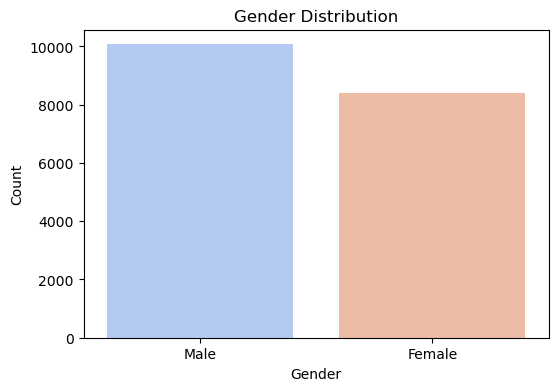

In [158]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", data=data, palette="coolwarm")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Age distribution of lung cancer patients

This histogram shows the age distribution of lung cancer patients. The data is filtered to include only those diagnosed with lung cancer. The chart provides a visual representation of the frequency of lung cancer cases across different age groups, highlighting the age groups most affected by the disease.

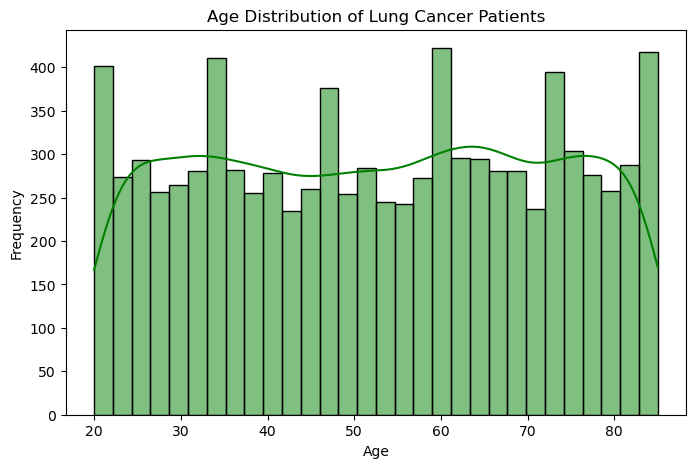

In [159]:

plt.figure(figsize=(8, 5))
sns.histplot(data[data["Lung_Cancer_Diagnosis"] == "Yes"]["Age"], bins=30, color="green", kde=True)
plt.title("Age Distribution of Lung Cancer Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# Smoking status vs. Lung Cancer

This bar chart shows the impact of smoking on lung cancer diagnosis. The data is grouped by smoking status and further divided by whether the individuals were diagnosed with lung cancer or not. The chart provides a visual representation of the correlation between smoking and lung cancer diagnosis.

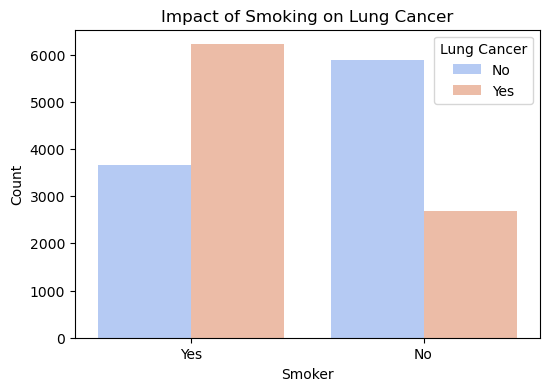

In [160]:

plt.figure(figsize=(6, 4))
sns.countplot(x="Smoker", hue="Lung_Cancer_Diagnosis", data=data, palette="coolwarm")
plt.title("Impact of Smoking on Lung Cancer")
plt.xlabel("Smoker")
plt.ylabel("Count")
plt.legend(title="Lung Cancer")
plt.show()

# Top Countries with Highest Lung Cancer Cases


This bar chart displays the top countries with the highest number of lung cancer cases. The data is filtered to include only those diagnosed with lung cancer, and the countries are sorted by the number of cases in descending order. The chart provides a visual representation of the countries most affected by lung cancer, highlighting the global distribution of the disease.

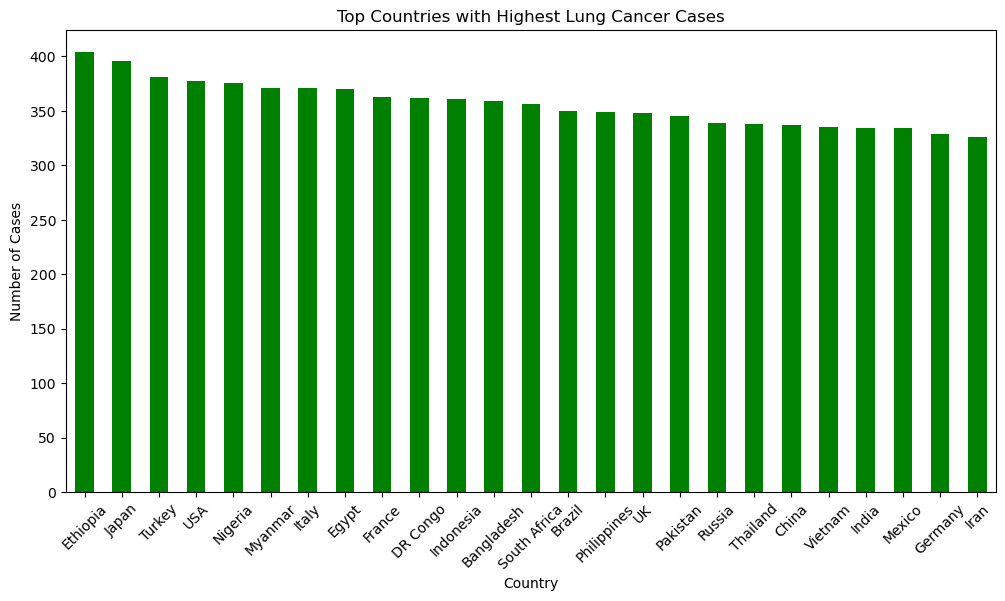

In [161]:

plt.figure(figsize=(12, 6))
top_countries = data[data["Lung_Cancer_Diagnosis"] == "Yes"]["Country"].value_counts()
top_countries.plot(kind="bar", color="green")
plt.title("Top Countries with Highest Lung Cancer Cases")
plt.xlabel("Country")
plt.ylabel("Number of Cases")
plt.xticks(rotation=45)
plt.show()

# Survival years vs Cancer stage

This boxplot visualizes the survival years of lung cancer patients across different cancer stages. The stages are ordered from 'No Cancer' to 'Stage 4', providing a clear comparison of survival years at each stage. The plot helps in understanding the impact of cancer stage on patient survival.

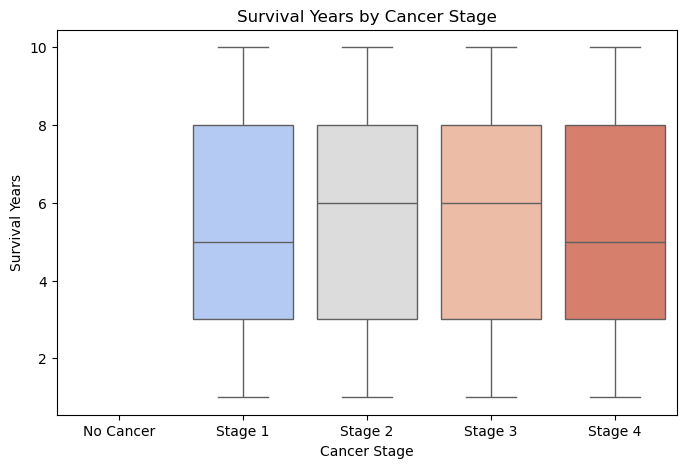

In [162]:
cancer_stage_order = ['No Cancer', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4']

plt.figure(figsize=(8, 5))
sns.boxplot(x="Cancer_Stage", y="Survival_Years", data=data[data["Lung_Cancer_Diagnosis"] == "Yes"], order=cancer_stage_order, palette="coolwarm")
plt.title("Survival Years by Cancer Stage")
plt.xlabel("Cancer Stage")
plt.ylabel("Survival Years")
plt.show()

# Plotting categorical columns & numerical columns


Plotting categorical columns


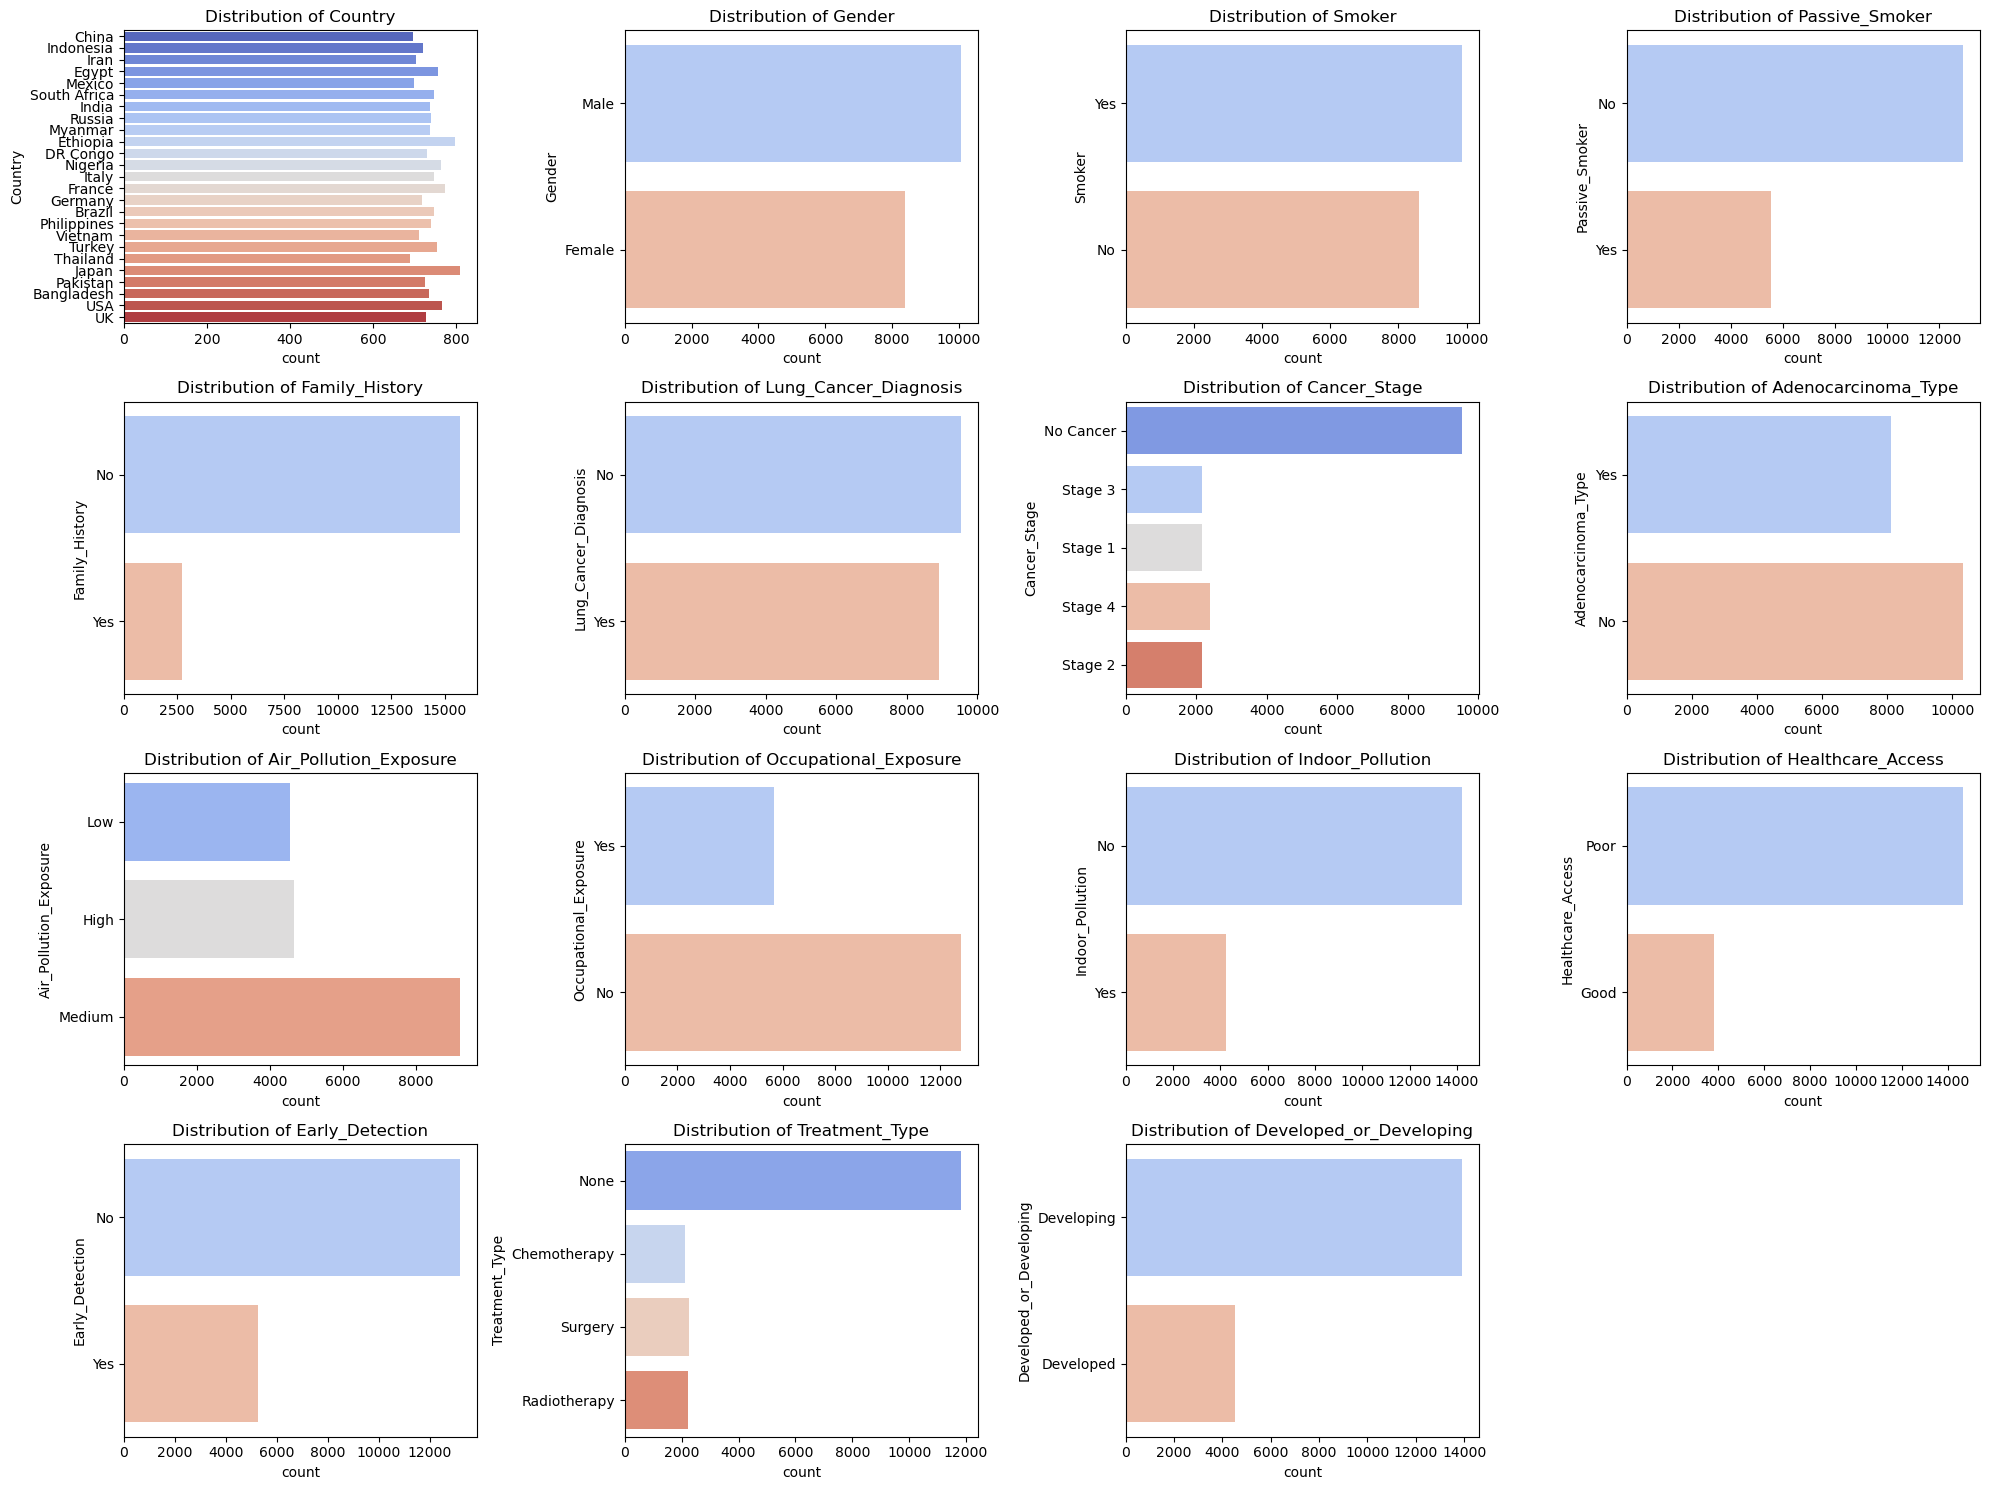

In [163]:
categorical_cols = data.select_dtypes(include=['object']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 4, i)
    sns.countplot(y=col, data=data, palette="coolwarm")
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

Plotting numerical columns


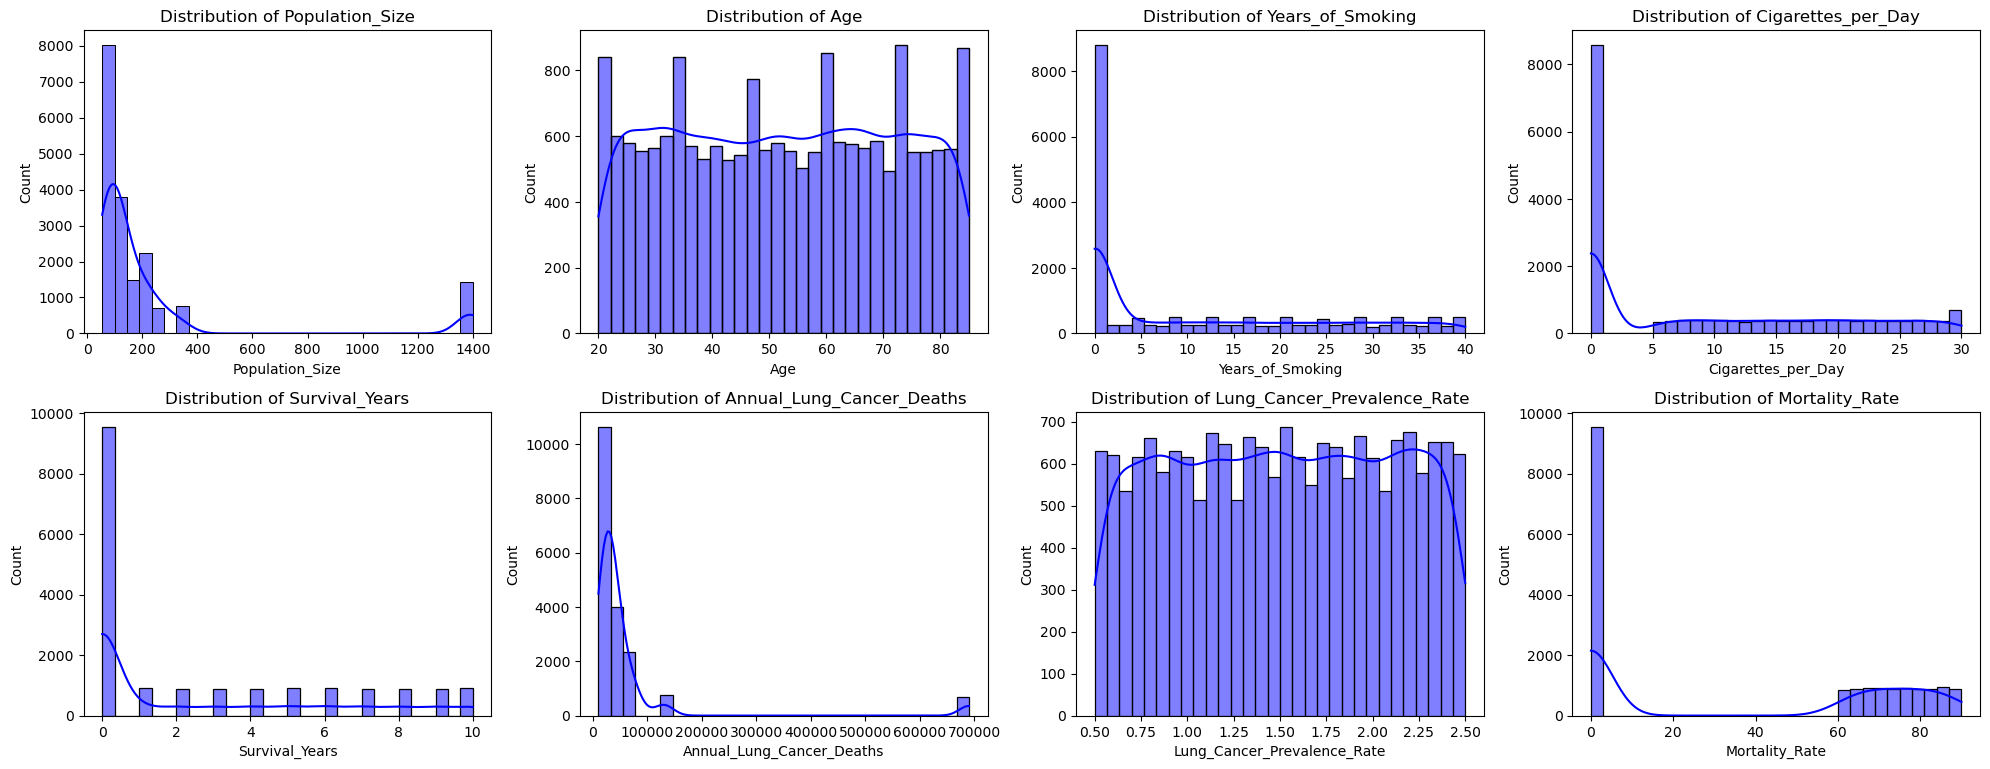

In [164]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

# correlation analysis

In [165]:
numeric_df = data.select_dtypes(include=[ 'int64', 'float64'])
numeric_df.head()
cor=numeric_df.corr()
cor

,Population_Size,Age,Years_of_Smoking,Cigarettes_per_Day,Survival_Years,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
Population_Size,1.000000,-0.004197,0.001077,0.002394,-0.009366,0.719369,0.003984,-0.008184
Age,-0.004197,1.000000,0.002646,0.005313,0.015731,-0.000012,-0.009821,0.010780
Years_of_Smoking,0.001077,0.002646,1.000000,0.663319,0.193893,0.002628,0.006194,0.235617
Cigarettes_per_Day,0.002394,0.005313,0.663319,1.000000,0.219037,0.003555,0.006948,0.265346
Survival_Years,-0.009366,0.015731,0.193893,0.219037,1.000000,0.001100,-0.002234,0.800294
Annual_Lung_Cancer_Deaths,0.719369,-0.000012,0.002628,0.003555,0.001100,1.000000,0.006562,-0.000858
Lung_Cancer_Prevalence_Rate,0.003984,-0.009821,0.006194,0.006948,-0.002234,0.006562,1.000000,-0.000463
Mortality_Rate,-0.008184,0.010780,0.235617,0.265346,0.800294,-0.000858,-0.000463,1.000000


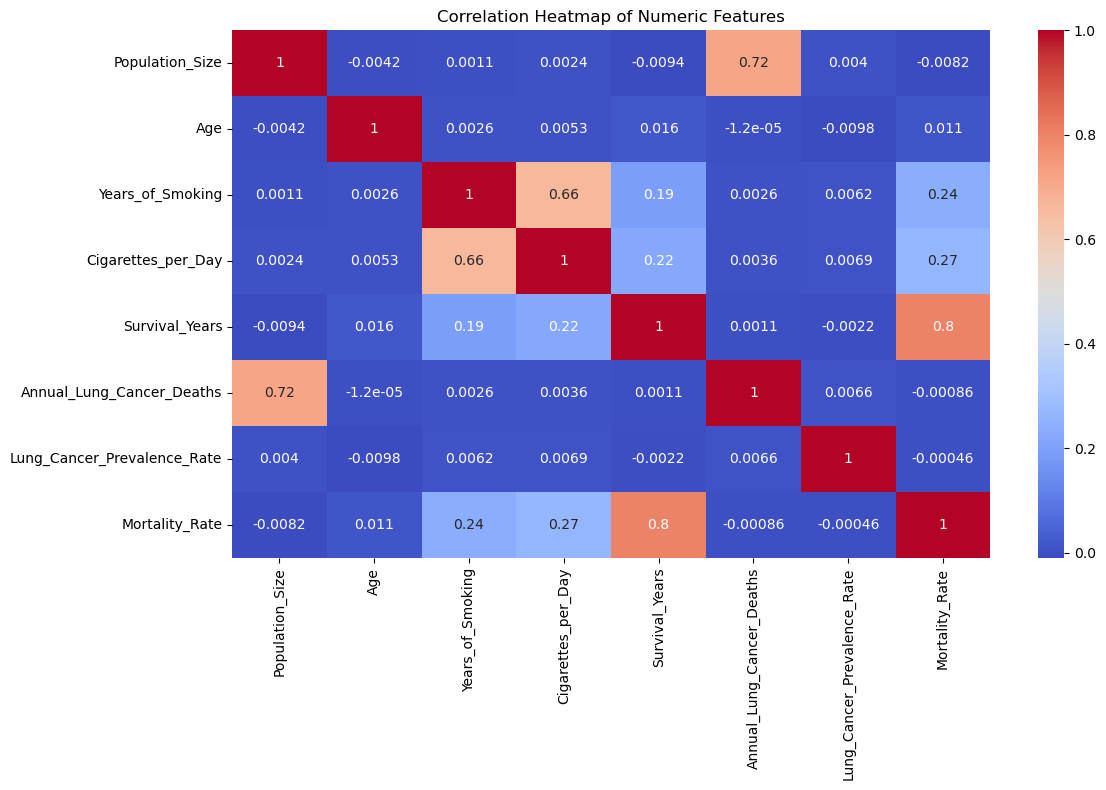

In [166]:
plt.figure(figsize=(12, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

# PREPROCESSING

* Dropping unneccessary columns

In [167]:
columns_to_drop = [ 'Survival_Years', 'Adenocarcinoma_Type','Annual_Lung_Cancer_Deaths', 
                   'Lung_Cancer_Prevalence_Rate', 'Mortality_Rate']
data.drop(columns=columns_to_drop, inplace=True)

In [168]:
data.head() 

,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,Lung_Cancer_Diagnosis,Cancer_Stage,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing
0,China,1400,80,Male,Yes,30,29,No,No,No,No Cancer,Low,Yes,No,Poor,No,None,Developing
1,Indonesia,273,47,Female,No,0,0,Yes,No,Yes,Stage 3,High,Yes,No,Poor,Yes,Chemotherapy,Developing
2,Iran,84,53,Male,No,0,0,Yes,No,No,No Cancer,Low,Yes,No,Poor,No,None,Developing
3,Egypt,102,71,Male,Yes,36,7,Yes,No,Yes,Stage 1,Low,No,No,Poor,No,Chemotherapy,Developing
4,Mexico,128,47,Male,Yes,12,6,Yes,No,No,No Cancer,Medium,No,No,Poor,Yes,None,Developing


* Update the list of categorical columns after dropping unnecessary columns


In [169]:
remaining_categorical_cols = [col for col in categorical_cols if col not in columns_to_drop]

In [170]:
remaining_categorical_cols

['Country',
 'Gender',
 'Smoker',
 'Passive_Smoker',
 'Family_History',
 'Lung_Cancer_Diagnosis',
 'Cancer_Stage',
 'Air_Pollution_Exposure',
 'Occupational_Exposure',
 'Indoor_Pollution',
 'Healthcare_Access',
 'Early_Detection',
 'Treatment_Type',
 'Developed_or_Developing']

* Doing label encoding on remaining categorical columns

In [171]:

label_encoders = {}
for col in remaining_categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [172]:
data.head()

,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,Lung_Cancer_Diagnosis,Cancer_Stage,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing
0,2,1400,80,1,1,30,29,0,0,0,0,1,1,0,1,0,1,1
1,9,273,47,0,0,0,0,1,0,1,3,0,1,0,1,1,0,1
2,10,84,53,1,0,0,0,1,0,0,0,1,1,0,1,0,1,1
3,4,102,71,1,1,36,7,1,0,1,1,1,0,0,1,0,0,1
4,13,128,47,1,1,12,6,1,0,0,0,2,0,0,1,1,1,1


# PREDECTIVE MODELLING

* Spliting into input and output data

In [173]:
output_related_columns = ['Lung_Cancer_Diagnosis', 'Cancer_Stage']
X = data.drop(columns=output_related_columns)
y = data['Lung_Cancer_Diagnosis']

* Split the data into training and testing sets


In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Training and testing data prepared:')
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

Training and testing data prepared:
X_train shape: (12922, 16)
X_test shape: (5539, 16)


In [175]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# LogisticRegression

In [176]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%')
print("Classification Report :")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression Accuracy: 61.76%
Classification Report :
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      2873
           1       0.60      0.61      0.60      2666

    accuracy                           0.62      5539
   macro avg       0.62      0.62      0.62      5539
weighted avg       0.62      0.62      0.62      5539

Confusion Matrix :
[[1807 1066]
 [1052 1614]]


In [177]:

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)
best_params_lr = grid_search_lr.best_params_
best_score_lr = grid_search_lr.best_score_

print(f"Best Parameters for Logistic Regression: {best_params_lr}")
print(f"Best Cross-Validation Accuracy for Logistic Regression: {best_score_lr * 100:.2f}%")

best_lr_model = grid_search_lr.best_estimator_
y_pred_best_lr = best_lr_model.predict(X_test)
best_accuracy_lr = accuracy_score(y_test, y_pred_best_lr)
print(f"Test Set Accuracy with Best Parameters for Logistic Regression: {best_accuracy_lr * 100:.2f}%")
print("Classification Report :")
print(classification_report(y_test, y_pred_best_lr))
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred_best_lr))

Best Parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy for Logistic Regression: 60.97%
Test Set Accuracy with Best Parameters for Logistic Regression: 61.76%
Classification Report :
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      2873
           1       0.60      0.61      0.60      2666

    accuracy                           0.62      5539
   macro avg       0.62      0.62      0.62      5539
weighted avg       0.62      0.62      0.62      5539

Confusion Matrix :
[[1807 1066]
 [1052 1614]]


# RandomForestClassifier

In [178]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Classifier Accuracy: {accuracy * 100:.2f}%')
print("Classification Report :")
print(classification_report(y_test, y_pred))
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred))

Random Forest Classifier Accuracy: 86.32%
Classification Report :
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      2873
           1       0.95      0.75      0.84      2666

    accuracy                           0.86      5539
   macro avg       0.88      0.86      0.86      5539
weighted avg       0.88      0.86      0.86      5539

Confusion Matrix :
[[2772  101]
 [ 657 2009]]


In [179]:

param_grid = {
    'n_estimators': [50,100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Accuracy: {best_score * 100:.2f}%")

best_rf_model = grid_search.best_estimator_
y_pred_best = best_rf_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Test Set Accuracy with Best Parameters: {best_accuracy * 100:.2f}%")
print("Classification Report :")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred_best))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best Cross-Validation Accuracy: 87.67%
Test Set Accuracy with Best Parameters: 87.56%
Classification Report :
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2873
           1       1.00      0.74      0.85      2666

    accuracy                           0.88      5539
   macro avg       0.90      0.87      0.87      5539
weighted avg       0.90      0.88      0.87      5539

Confusion Matrix :
[[2873    0]
 [ 689 1977]]


# DecisionTreeClassifier


In [180]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
accuracy_tree = accuracy_score(y_test, tree_pred)
print(f'Decision Tree Accuracy: {accuracy_tree * 100:.2f}%')
print("Classification Report :")
print(classification_report(y_test, tree_pred))
print("Confusion Matrix :")
print(confusion_matrix(y_test, tree_pred))

Decision Tree Accuracy: 80.65%
Classification Report :
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2873
           1       0.79      0.81      0.80      2666

    accuracy                           0.81      5539
   macro avg       0.81      0.81      0.81      5539
weighted avg       0.81      0.81      0.81      5539

Confusion Matrix :
[[2299  574]
 [ 498 2168]]


In [181]:
param_grid_tree = {
    'max_depth': [None,5, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid_tree, cv=3, n_jobs=-1, verbose=2)
grid_search_tree.fit(X_train, y_train)
best_params_tree = grid_search_tree.best_params_
best_score_tree = grid_search_tree.best_score_

print(f"Best Parameters for Decision Tree: {best_params_tree}")
print(f"Best Cross-Validation Accuracy for Decision Tree: {best_score_tree * 100:.2f}%")

best_tree_model = grid_search_tree.best_estimator_
y_pred_best_tree = best_tree_model.predict(X_test)
best_accuracy_tree = accuracy_score(y_test, y_pred_best_tree)
print(f"Test Set Accuracy with Best Parameters for Decision Tree: {best_accuracy_tree * 100:.2f}%")
print("Classification Report :")
print(classification_report(y_test, y_pred_best_tree))
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred_best_tree))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters for Decision Tree: {'max_depth': 5, 'min_samples_split': 2}
Best Cross-Validation Accuracy for Decision Tree: 87.64%
Test Set Accuracy with Best Parameters for Decision Tree: 87.56%
Classification Report :
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2873
           1       1.00      0.74      0.85      2666

    accuracy                           0.88      5539
   macro avg       0.90      0.87      0.87      5539
weighted avg       0.90      0.88      0.87      5539

Confusion Matrix :
[[2873    0]
 [ 689 1977]]


# KNeighborsClassifier

In [182]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'K-Nearest Neighbors Accuracy: {accuracy_knn * 100:.2f}%')
print("Classification Report :")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred_knn))

K-Nearest Neighbors Accuracy: 76.69%
Classification Report :
              precision    recall  f1-score   support

           0       0.73      0.88      0.80      2873
           1       0.84      0.64      0.73      2666

    accuracy                           0.77      5539
   macro avg       0.78      0.76      0.76      5539
weighted avg       0.78      0.77      0.76      5539

Confusion Matrix :
[[2541  332]
 [ 959 1707]]


In [183]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, cv=3, n_jobs=-1, verbose=2)
grid_search_knn.fit(X_train, y_train)
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print(f"Best Parameters for KNN: {best_params_knn}")
print(f"Best Cross-Validation Accuracy for KNN: {best_score_knn * 100:.2f}%")

best_knn_model = grid_search_knn.best_estimator_
y_pred_best_knn = best_knn_model.predict(X_test)
best_accuracy_knn = accuracy_score(y_test, y_pred_best_knn)
print(f"Test Set Accuracy with Best Parameters for KNN: {best_accuracy_knn * 100:.2f}%")
print("Classification Report :")
print(classification_report(y_test, y_pred_best_knn))
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred_best_knn))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}
Best Cross-Validation Accuracy for KNN: 74.66%
Test Set Accuracy with Best Parameters for KNN: 75.99%
Classification Report :
              precision    recall  f1-score   support

           0       0.72      0.87      0.79      2873
           1       0.82      0.64      0.72      2666

    accuracy                           0.76      5539
   macro avg       0.77      0.76      0.75      5539
weighted avg       0.77      0.76      0.76      5539

Confusion Matrix :
[[2505  368]
 [ 962 1704]]


# Support vector

In [184]:
svc_model = SVC(kernel='linear',random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f'Support Vector Classifier Accuracy: {accuracy_svc * 100:.2f}%')
print("Classification Report :")
print(classification_report(y_test, y_pred_svc))
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred_svc))

Support Vector Classifier Accuracy: 67.67%
Classification Report :
              precision    recall  f1-score   support

           0       0.66      0.77      0.71      2873
           1       0.70      0.58      0.63      2666

    accuracy                           0.68      5539
   macro avg       0.68      0.67      0.67      5539
weighted avg       0.68      0.68      0.67      5539

Confusion Matrix :
[[2215  658]
 [1133 1533]]


In [185]:
param_grid_svc = {
    'C': [0.1, 1],
    'gamma': [1, 0.1, 0.01],
    'kernel': [ 'linear']
}
grid_search_svc = GridSearchCV(estimator=svc_model, param_grid=param_grid_svc, cv=3, n_jobs=-1, verbose=2)
grid_search_svc.fit(X_train, y_train)
best_params_svc = grid_search_svc.best_params_
best_score_svc = grid_search_svc.best_score_

print(f"Best Parameters for SVC: {best_params_svc}")
print(f"Best Cross-Validation Accuracy for SVC: {best_score_svc * 100:.2f}%")

best_svc_model = grid_search_svc.best_estimator_
y_pred_best_svc = best_svc_model.predict(X_test)
best_accuracy_svc = accuracy_score(y_test, y_pred_best_svc)

print(f"Test Set Accuracy with Best Parameters for SVC: {best_accuracy_svc * 100:.2f}%")
print("Classification Report :")
print(classification_report(y_test, y_pred_best_svc))
print("Confusion Matrix :")
print(confusion_matrix(y_test, y_pred_best_svc))

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best Parameters for SVC: {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
Best Cross-Validation Accuracy for SVC: 66.00%
Test Set Accuracy with Best Parameters for SVC: 65.84%
Classification Report :
              precision    recall  f1-score   support

           0       0.65      0.72      0.69      2873
           1       0.66      0.59      0.62      2666

    accuracy                           0.66      5539
   macro avg       0.66      0.66      0.66      5539
weighted avg       0.66      0.66      0.66      5539

Confusion Matrix :
[[2073  800]
 [1092 1574]]


# ROC CURVE

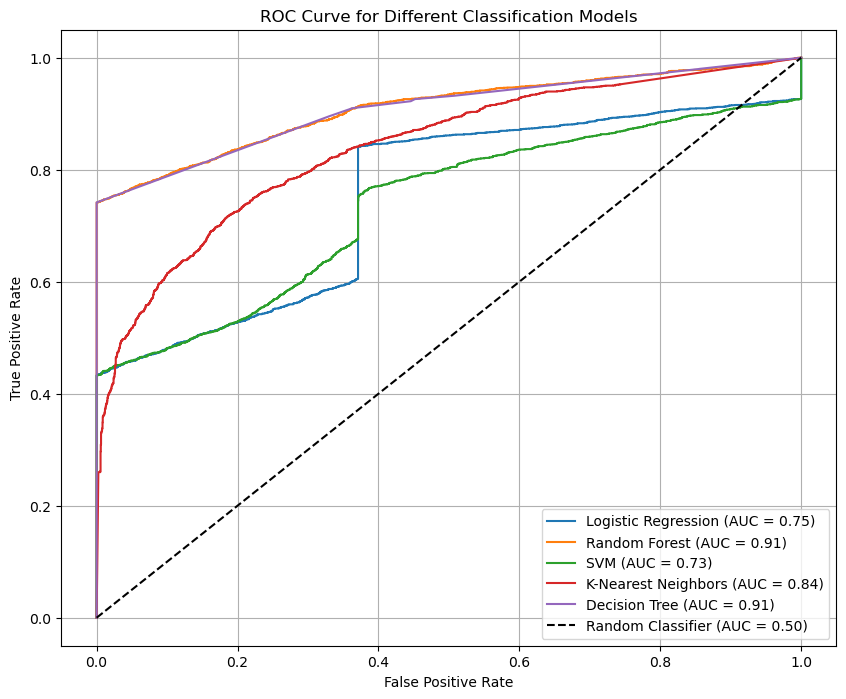

In [186]:

from sklearn.metrics import roc_curve, auc


# Define the classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(C=0.1, penalty='l2', solver='liblinear', random_state=42),
    "Random Forest": RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=100, random_state=42),
    "SVM": SVC(C=0.1, gamma=1, kernel='linear', probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=7, weights='distance'),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42)
}

# Plot the ROC curve for each classifier
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred_prob = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')

# Customize the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Different Classification Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# BEST MODEL

In [187]:
best_model = RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=100, random_state=42)
best_model.fit(X_train, y_train)
best_model_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, best_model_pred)
print(f'Random Forest Classifier Accuracy: {accuracy * 100:.2f}%')
print("Classification Report :")
print(classification_report(y_test, best_model_pred))
print("Confusion Matrix :")
print(confusion_matrix(y_test, best_model_pred))

Random Forest Classifier Accuracy: 87.56%
Classification Report :
              precision    recall  f1-score   support

           0       0.81      1.00      0.89      2873
           1       1.00      0.74      0.85      2666

    accuracy                           0.88      5539
   macro avg       0.90      0.87      0.87      5539
weighted avg       0.90      0.88      0.87      5539

Confusion Matrix :
[[2873    0]
 [ 689 1977]]


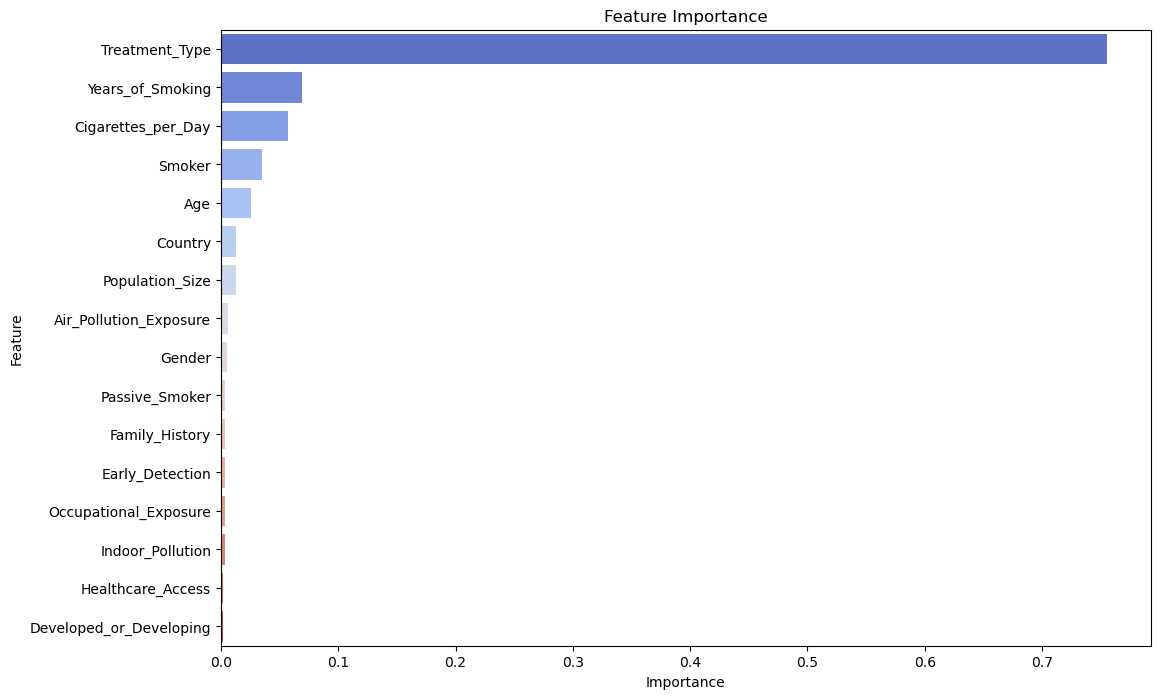

In [197]:
# Get feature importances from the best model
importances = best_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# SAMPLE PREDICTIONS

In [189]:
sample_0 = X.iloc[0].values 
sample_0 

array([   2, 1400,   80,    1,    1,   30,   29,    0,    0,    1,    1,
          0,    1,    0,    1,    1], dtype=int64)

In [190]:
sample_0_df = pd.DataFrame([sample_0], columns=X.columns)
sample_0_df

,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing
0,2,1400,80,1,1,30,29,0,0,1,1,0,1,0,1,1


In [191]:
sample_1 = X.iloc[1].values 
sample_1

array([  9, 273,  47,   0,   0,   0,   0,   1,   0,   0,   1,   0,   1,
         1,   0,   1], dtype=int64)

In [192]:
sample_1_df = pd.DataFrame([sample_1], columns=X.columns)
sample_1_df

,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing
0,9,273,47,0,0,0,0,1,0,0,1,0,1,1,0,1


In [193]:
# Scale the sample data
sample_0_scaled = scaler.transform(sample_0_df)
sample_1_scaled = scaler.transform(sample_1_df)

# Predict using the best model
sample_0_prediction = best_model.predict(sample_0_scaled)
sample_1_prediction = best_model.predict(sample_1_scaled)

print(f'Prediction for sample_0: {sample_0_prediction[0]}')
print(f'Prediction for sample_1: {sample_1_prediction[0]}')

Prediction for sample_0: 0
Prediction for sample_1: 1


# CONCLUSION

In this project, we analyzed a dataset related to lung cancer prediction across 25 countries. We performed data exploration, visualization, preprocessing, and predictive modeling using various machine learning algorithms. Here are the key points and findings:

## Data Exploration and Visualization
1. **Basic Information**: The dataset contains 18 columns and 18461 rows. We explored the basic information, summary statistics, and missing values.
2. **Visualizations**: We created various visualizations to understand the distribution of lung cancer cases, gender distribution, age distribution of lung cancer patients, impact of smoking, and top countries with the highest lung cancer cases.

## Data Preprocessing
1. **Handling Missing Values**: Missing values in the `Cancer_Stage` and `Treatment_Type` columns were filled with appropriate values.
2. **Dropping Unnecessary Columns**: Columns such as `Survival_Years`, `Adenocarcinoma_Type`, `Annual_Lung_Cancer_Deaths`, `Lung_Cancer_Prevalence_Rate`, and `Mortality_Rate` were dropped.
3. **Label Encoding**: Categorical columns were label encoded for modeling purposes.
4. **Feature Scaling**: Numerical features were scaled using `StandardScaler`.

## Predictive Modeling
1. **Logistic Regression**: Achieved an accuracy of 61.76% with the best parameters.
2. **Random Forest Classifier**: Achieved the highest accuracy of 87.56% with the best parameters.
3. **Decision Tree Classifier**: Achieved an accuracy of 87.56% with the best parameters.
4. **K-Nearest Neighbors**: Achieved an accuracy of 75.99% with the best parameters.
5. **Support Vector Classifier**: Achieved an accuracy of 65.84% with the best parameters.

## Model Comparison
- The **Random Forest Classifier** and **Decision Tree Classifier** performed the best with an accuracy of 87.56%.
- The **Logistic Regression** and **Support Vector Classifier** had lower accuracies compared to other models.
- The **K-Nearest Neighbors** model performed moderately well with an accuracy of 75.99%.

## Feature Importance
- The most important feature for predicting lung cancer was `Treatment_Type`, followed by `Years_of_Smoking` and `Cigarettes_per_Day`.

## Conclusion
- The Random Forest Classifier and Decision Tree Classifier are the best models for predicting lung cancer in this dataset.
- Smoking-related features such as `Years_of_Smoking` and `Cigarettes_per_Day` are significant predictors of lung cancer.
- Further analysis and feature engineering could potentially improve model performance.

This concludes the analysis and modeling process for lung cancer prediction. The results highlight the importance of smoking-related factors and the effectiveness of ensemble methods in predictive modeling.